#  Predicting Student Exam Scores Using Machine Learning

##  Problem Statement

Academic success in Spain’s *Título de Bachiller* system is influenced by various factors such as study habits, parental background, attendance, and support systems. In this project, we aim to build a machine learning model that can predict a student's final **Exam Score**, helping identify students at academic risk for early intervention.

---

##  Objective

To develop regression models that can accurately predict the `Exam_Score` using features such as:
- Hours studied per week
- Attendance
- Tutoring support
- Gender
- Region (Urban/Rural)
- Parent's education level

---

##  Dataset Overview

- **Dataset Name:** SAP-4000
- **Total Records:** 4,000 students
- **Target Variable:** `Exam_Score` (10.0 – 100.0)

###  Features:
| Variable          | Type                | Description |
|------------------|---------------------|-------------|
| Gender           | Categorical (Nominal) | Male, Female |
| HoursStudied/Week| Numeric (Continuous) | 0.0 – 16.0 |
| Tutoring         | Categorical (Binary) | Yes, No |
| Region           | Categorical (Nominal) | Urban, Rural |
| Attendance (%)   | Numeric (Continuous) | 50.0 – 100.0 |
| ParentEducation  | Categorical (Ordinal) | None, Primary, Secondary, Tertiary |
| Exam_Score       | Numeric (Target)    | 10.0 – 100.0 |

---

##  Step 1: Data Preprocessing

- Handle missing values (if any).
- Convert categorical data to numerical:
  - **Label Encoding** for `ParentEducation` (ordinal).
  - **One-Hot Encoding** for `Gender`, `Region`, `Tutoring` (nominal).
- Normalize/scale numeric features if needed (optional).

---

##  Step 2: Feature Selection

- **Heatmap:** Visualize correlation between numerical features and `Exam_Score`.
- **SelectKBest:** Use `f_regression` to select top relevant features.

```python
from sklearn.feature_selection import SelectKBest, f_regression


##  Step 3: Model Building

We will train the following regression models to predict `Exam_Score`:

- Linear Regression

- DecisionTreeRegressor

---

### Evaluation Metrics

For each model, evaluate performance using the following metrics:

- **R² Score (Train and Test)** — Measures how well the model explains the variance.
- **Mean Absolute Error (MAE)** — Average absolute difference between predicted and actual values.
- **Root Mean Squared Error (RMSE)** — Penalizes larger errors more.



##  Step 4: Cross-Validation

To evaluate how well our model generalizes to unseen data, we use **K-Fold Cross-Validation**.

### 🔹 What is K-Fold?
- The dataset is split into **k subsets (folds)**.
- The model is trained on k-1 folds and tested on the remaining fold.
- This process is repeated k times, and the results are averaged.

We will use **5-Fold Cross-Validation** and evaluate with the **R² score**.



##  Step 5: Overfitting Check

###  What is Overfitting?

Overfitting happens when a model learns the training data **too well**, including noise and outliers. As a result, it performs **poorly on new/unseen data**.

---

###  How to Detect Overfitting?

We compare the model's performance on the **training set** vs the **test set** using metrics like:

- **R² Score (Train vs Test)**
- **MAE / RMSE (Train vs Test)**

>  If **Train R² is high** and **Test R² is low**, the model is likely overfitting.



##  Step 6: Hyperparameter Tuning


---

###  Techniques

We’ll use:

- **GridSearchCV**: Tries all combinations of provided hyperparameters.


---




##  Step 7: Visualization & Interpretation

Once the final model is trained and tuned, it's important to **visually interpret** its predictions and behavior. This helps build trust in the model and understand what factors influence student performance.

---

###  1.  Actual vs Predicted Plot


In [41]:
#Import necessary libraries
import pandas as pd
import numpy as np

#For datavisualiztion 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression

In [42]:
data=pd.read_csv("C:/Users/cmgou/Documents/Meta scifor/Test 9.0/Test/SAP-4000.csv")
data.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,Tertiary,43.5
1,Female,6.8,No,Urban,62.0,Primary,51.7
2,Female,9.7,No,Rural,95.0,Secondary,70.1
3,Male,13.3,Yes,Rural,52.9,NaN,79.5
4,Female,8.9,No,Urban,50.8,NaN,52.2


In [43]:
data.shape

(4000, 7)

In [44]:
data.isna().sum()

Gender                 0
HoursStudied/Week      0
Tutoring               0
Region                 0
Attendance(%)          0
Parent Education     422
Exam_Score             0
dtype: int64

In [45]:
data['Parent Education'].value_counts()


Parent Education
Secondary    1590
Tertiary     1175
Primary       813
Name: count, dtype: int64

In [46]:
# Step 1: Define the order of education levels
edu_order = ['Primary', 'Secondary', 'Tertiary']

In [47]:
# Step 2: Convert to ordered categorical and encode as integers
data['Parent Education'] = pd.Categorical(data['Parent Education'], categories=edu_order, ordered=True).codes

In [48]:
data.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,2,43.5
1,Female,6.8,No,Urban,62.0,0,51.7
2,Female,9.7,No,Rural,95.0,1,70.1
3,Male,13.3,Yes,Rural,52.9,-1,79.5
4,Female,8.9,No,Urban,50.8,-1,52.2


In [18]:
data.isna().sum()

Gender               0
HoursStudied/Week    0
Tutoring             0
Region               0
Attendance(%)        0
Parent Education     0
Exam_Score           0
dtype: int64

In [6]:
data.describe()

,HoursStudied/Week,Attendance(%),Exam_Score
count,4000.000000,4000.000000,4000.000000
mean,9.861025,75.224150,71.107775
std,3.713801,14.496906,16.748950
min,0.000000,50.000000,16.600000
25%,7.400000,62.600000,59.300000
50%,9.900000,75.600000,71.550000
75%,12.600000,87.700000,83.500000
max,16.000000,100.000000,100.000000


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             4000 non-null   object 
 1   HoursStudied/Week  4000 non-null   float64
 2   Tutoring           4000 non-null   object 
 3   Region             4000 non-null   object 
 4   Attendance(%)      4000 non-null   float64
 5   Parent Education   3578 non-null   object 
 6   Exam_Score         4000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 218.9+ KB
None


In [12]:
data.Gender.value_counts()

Gender
Female    2040
Male      1960
Name: count, dtype: int64

In [49]:
data['Parent Education'].value_counts()


Parent Education
 1    1590
 2    1175
 0     813
-1     422
Name: count, dtype: int64

In [50]:
# Encode ordinal feature
parent_edu_order = {'None': 0, 'Primary': 1, 'Secondary': 2, 'Tertiary': 3}
data['Parent Education'] = data['Parent Education'].map(parent_edu_order)
parent_edu_order

{'None': 0, 'Primary': 1, 'Secondary': 2, 'Tertiary': 3}

In [51]:
# One-hot encoding for nominal categorical features
data = pd.get_dummies(data, columns=['Gender', 'Region', 'Tutoring'], drop_first=True)

In [52]:
 scaler = StandardScaler()
data[['HoursStudied/Week', 'Attendance(%)']] = scaler.fit_transform(data[['HoursStudied/Week', 'Attendance(%)']])

In [53]:
scaler

StandardScaler()

In [54]:
# Step 3: Feature Selection
X = data.drop('Exam_Score', axis=1)
y = data['Exam_Score']


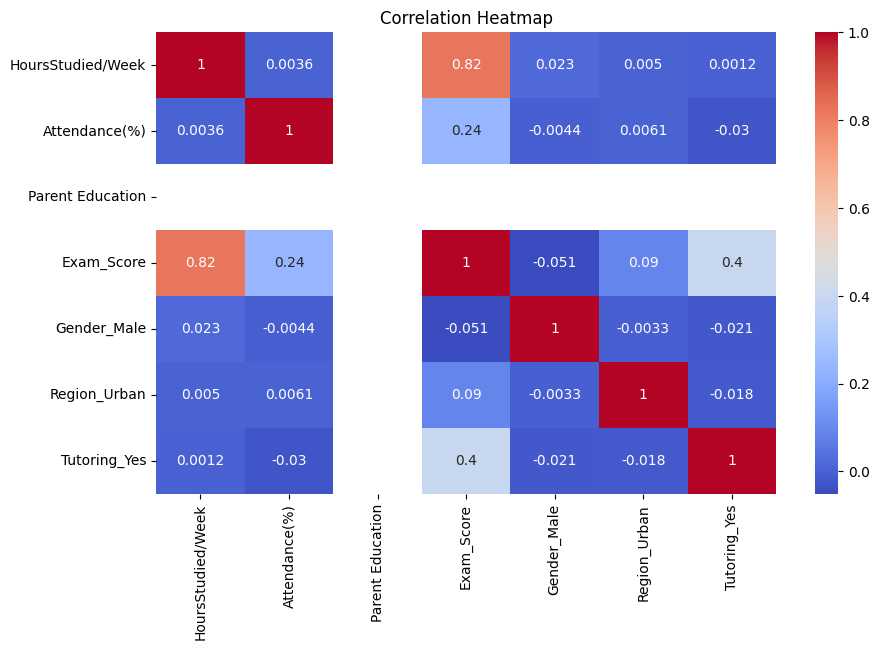

In [55]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [56]:
# Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)



ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [38]:
# Recreate X and y from your cleaned data
X = data.drop('Exam_Score', axis=1)
y = data['Exam_Score']

# Check for NaNs in X
print(X.isna().sum())


HoursStudied/Week       0
Attendance(%)           0
Parent Education     4000
Gender_Male             0
Region_Urban            0
Tutoring_Yes            0
dtype: int64
